<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1-1" data-toc-modified-id="Question-1-1-1">Question 1-1</a></span></li><li><span><a href="#Question-1-2" data-toc-modified-id="Question-1-2-2">Question 1-2</a></span></li><li><span><a href="#Question-1-3" data-toc-modified-id="Question-1-3-3">Question 1-3</a></span></li><li><span><a href="#Question1-4" data-toc-modified-id="Question1-4-4">Question1-4</a></span></li><li><span><a href="#Question2-1" data-toc-modified-id="Question2-1-5">Question2-1</a></span></li><li><span><a href="#Question-2-2" data-toc-modified-id="Question-2-2-6">Question 2-2</a></span></li><li><span><a href="#Question-2-3" data-toc-modified-id="Question-2-3-7">Question 2-3</a></span></li></ul></div>

In [2]:
% matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
def printOutput(output, question):
    asterisk = 100
    if question == '1-2':
        stat    = output[0]
        jan     = output[1]
        june    = output[2]
        adjustN = (asterisk - len(stat) - 2)//2
        print ('%s %s %s' % ('*'*adjustN,stat,'*'*adjustN))
        print ('%10s : %.2f' % ('January', jan))
        print ('%10s : %.2f' % ('June', june))
        print ('%s' % ('*'*asterisk))
    elif question == '1-4':
        name  = output[0]
        lower = output[1]
        upper = output[2]
        ratio = output[3]
        print ('%s' % ('*'*asterisk))
        print ('%.2f%% of instances in %s are noisy! (normal range is between %.2f and %.2f)' % (ratio, name, lower, upper))
        print ('%s' % ('*'*asterisk))       
    elif question == '2-1':
        ratio = output
        print ('%s' % ('*'*asterisk))
        print ('%% of weekend trips=%.2f' % (ratio))
        print ('%s' % ('*'*asterisk)) 
        

In [4]:
def FindDuration(rawData,startCol, endCol):
    '''
    (DataFrame, str, str) -> Series
    '''
    tStart = pd.to_datetime(rawData[startCol], format = '%d/%m/%y %H:%M')
    tEnd   = pd.to_datetime(rawData[endCol], format = '%d/%m/%y %H:%M')
    return (tEnd - tStart).dt.total_seconds()/60
    
    

### Question 1-1

In [5]:
# Reading the data into a DataFrame, finding the duration of each trip and creating a new DataFrame
#  Jauary
rawJan   = pd.read_csv('raw-january.csv',encoding = 'ISO-8859-1')
rawJan['Duration'] = FindDuration(rawJan,'pickup_datetime','dropoff_datetime')
dataJan  = rawJan[['Duration', 'trip_distance', 'passenger_count', 'payment_amount']].copy()

# June
rawJune  = pd.read_csv('raw-june.csv'
                       ,encoding = 'ISO-8859-1')
rawJune['Duration'] = FindDuration(rawJune,'pickup_datetime','dropoff_datetime')
dataJune = rawJune[['Duration', 'trip_distance', 'passenger_count', 'payment_amount']].copy()


### Question 1-2

In [6]:
feaureSet = ['trip_distance', 'passenger_count', 'Duration']
for feaure in feaureSet:
    meanJan  = dataJan[feaure].mean()
    meanJune = dataJune[feaure].mean()
    printOutput([feaure,meanJan, meanJune], question = '1-2')

****************************************** trip_distance ******************************************
   January : 2.88
      June : 3.05
****************************************************************************************************
***************************************** passenger_count *****************************************
   January : 1.67
      June : 1.66
****************************************************************************************************
********************************************* Duration *********************************************
   January : 14.96
      June : 17.00
****************************************************************************************************


### Question 1-3

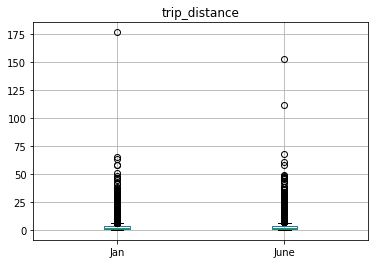

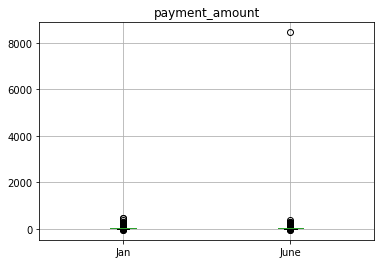

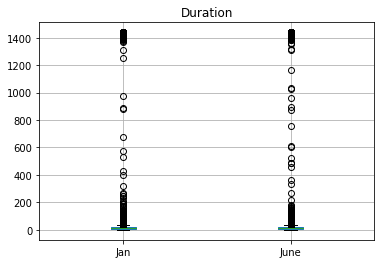

In [7]:
# Optional: before plotting the boxplots, you may remove the outliers  
feaureSet = ['trip_distance', 'payment_amount', 'Duration']
for feaure in feaureSet:
    plt.clf()
    concatInfo = pd.concat([dataJan[feaure], dataJune[feaure]], axis = 1, keys = ['Jan', 'June'])
    concatInfo.boxplot()
    plt.title(feaure)
    plt.show()




pd.concat() concatenates Dataframe objects and can be replaced by the following lines:

concatInfo = pd.DataFrame() 

concatInfo['Jan']  = dataJan[c] 

concatInfo['June'] = dataJune[c]


### Question1-4

In [8]:

# The upperbound of the ranges are selected as q3+3*IQR (except for the number of passengers)
# The lower bound of the ranges are selected intuitively

# part 1 of the question
normRange = {'Duration':[1,50], 'trip_distance':[0.1, 10.0], 'payment_amount':[2, 44.0],'passenger_count':[1,5] }
feaureSet = ['Duration','trip_distance','payment_amount','passenger_count']
records   = len(dataJan)

for feature in feaureSet:
    minR   = normRange[feature][0]
    maxR   = normRange[feature][1]
    fMean  = dataJan[feature].mean()
    
    # part 2 of the question
    lower  = dataJan[dataJan[feature]<minR]
    higher = dataJan[dataJan[feature]>maxR]
    ratio  = 100*(len(lower)+len(higher))/records
    printOutput([feature, minR, maxR, ratio], question='1-4')
    
    # part 3 of the question
    dataJan.loc[lower.index, feature]  = fMean
    dataJan.loc[higher.index, feature] = fMean


****************************************************************************************************
1.77% of instances in Duration are noisy! (normal range is between 1.00 and 50.00)
****************************************************************************************************
****************************************************************************************************
6.09% of instances in trip_distance are noisy! (normal range is between 0.10 and 10.00)
****************************************************************************************************
****************************************************************************************************
4.87% of instances in payment_amount are noisy! (normal range is between 2.00 and 44.00)
****************************************************************************************************
****************************************************************************************************
3.41% of instances in passenger_c

### Question2-1

In [9]:
cleanJan = pd.read_csv('clean-january.csv',encoding = 'ISO-8859-1')
tStart   = pd.to_datetime(cleanJan['pickup_datetime'], format = '%d/%m/%y %H:%M')

#Alternatively, if using DatetimeIndex
#fmt='%d/%m/%y %H:%M'
#cleanJan['hour']=pd.DatetimeIndex(pd.to_datetime(cleanJan['pickup_datetime'],format=fmt)).hour
#...

cleanJan['weekday']   = tStart.dt.dayofweek  # dt.weekday would return the same value
#  The day indices start from 0: Monday=0 ...Sunday=6
cleanJan['isweekend'] = [1 if (x>4) else 0 for x in cleanJan['weekday']]
total = cleanJan.shape[0]
weekends=cleanJan.groupby('isweekend').size()[1]
printOutput((weekends/total)*100, question = '2-1')


****************************************************************************************************
% of weekend trips=29.09
****************************************************************************************************


### Question 2-2

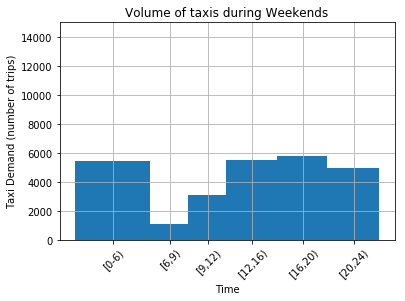

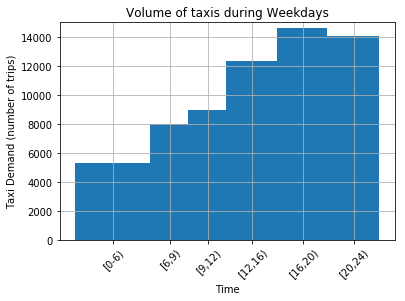

In [9]:
def PlotHist(data, title):
    names   = ['[0-6)','[6,9)','[9,12)','[12,16)','[16,20)','[20,24)']
    picture = data['hour'].hist(bins=[0,5.9,8.9,11.9,15.9,19.9,24])
    picture.set_title("Volume of taxis during " + title)
    picture.set_xlabel("Time")
    picture.set_ylabel("Taxi Demand (number of trips)")
    picture.set_xticks([3,7.5,10.5,14,18,22])
    picture.set_xticklabels(names,rotation=45)
    picture.set_ylim([0,15000])
    plt.show()

cleanJan ['hour'] = tStart.dt.hour 
Weekend = cleanJan.loc[cleanJan['weekday']>4]
Weekday = cleanJan.loc[cleanJan['weekday']<5]
PlotHist(Weekend, 'Weekends')
PlotHist(Weekday, 'Weekdays')


### Question 2-3

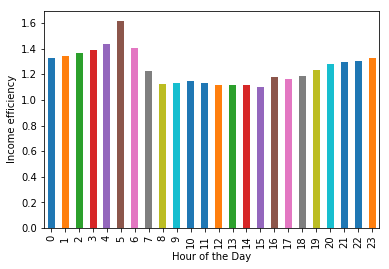

In [10]:
cleanJan['Duration'] = FindDuration(cleanJan,'pickup_datetime','dropoff_datetime')
cleanJan['income_efficiency']= cleanJan['payment_amount']/cleanJan['Duration']

#income plot by hour (x axis) and day (y axis)
bygroup = cleanJan.groupby('hour')
picture=bygroup['income_efficiency'].mean().plot(kind='bar')
picture.set_ylabel("Income efficiency")
picture.set_xlabel("Hour of the Day")
plt.show()